<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-labraries-and-Data" data-toc-modified-id="Importing-labraries-and-Data-1">Importing labraries and Data</a></span><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis-EDA" data-toc-modified-id="Exploratory-Data-Analysis-EDA-1.1">Exploratory Data Analysis EDA</a></span><ul class="toc-item"><li><span><a href="#Orders" data-toc-modified-id="Orders-1.1.1">Orders</a></span></li><li><span><a href="#Revenue" data-toc-modified-id="Revenue-1.1.2">Revenue</a></span></li><li><span><a href="#Customers-and-Items" data-toc-modified-id="Customers-and-Items-1.1.3">Customers and Items</a></span></li></ul></li><li><span><a href="#RFM-Segmentation" data-toc-modified-id="RFM-Segmentation-1.2">RFM Segmentation</a></span></li><li><span><a href="#Cohort-Analysis" data-toc-modified-id="Cohort-Analysis-1.3">Cohort Analysis</a></span></li><li><span><a href="#Market-Basket-Analysis" data-toc-modified-id="Market-Basket-Analysis-1.4">Market Basket Analysis</a></span></li><li><span><a href="#Customer-lifetime-value" data-toc-modified-id="Customer-lifetime-value-1.5">Customer lifetime value</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Basic-Frequency/Recency-analysis-using-the-BG/NBD-model" data-toc-modified-id="Basic-Frequency/Recency-analysis-using-the-BG/NBD-model-1.5.0.1">Basic Frequency/Recency analysis using the BG/NBD model</a></span></li><li><span><a href="#Frequency/Recency-Matrix" data-toc-modified-id="Frequency/Recency-Matrix-1.5.0.2">Frequency/Recency Matrix</a></span></li><li><span><a href="#probability-of-still-being-alive" data-toc-modified-id="probability-of-still-being-alive-1.5.0.3">probability of still being alive</a></span></li><li><span><a href="#Spliting-calibration-and-holdout-period" data-toc-modified-id="Spliting-calibration-and-holdout-period-1.5.0.4">Spliting calibration and holdout period</a></span></li><li><span><a href="#The-Gamma-Gamma-model" data-toc-modified-id="The-Gamma-Gamma-model-1.5.0.5">The Gamma-Gamma model</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Importing labraries and Data

In [1]:
# import libraries
# Data processing
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.preprocessing import StandardScaler
# Data Viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
# BMA
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
# CLV
from lifetimes.utils import summary_data_from_transaction_data,calibration_and_holdout_data
from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.plotting import plot_frequency_recency_matrix, plot_probability_alive_matrix, plot_period_transactions, plot_calibration_purchases_vs_holdout_purchases

In [2]:
# import libraries
data0910 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
data1011 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')
data = pd.concat([data0910,data1011])
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
data.shape

(1067371, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


Nots that: There are Missing Data in Description and The Customer ID Columns , let's check that

In [5]:
#Check and delete Missing Data
data.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [6]:
data.rename(columns={'Customer ID':'CustomerID'},inplace= True)
data = data.dropna(subset=['CustomerID'])

In [7]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
CustomerID     0
Country        0
dtype: int64

In [8]:
#Check & Clean Duplicates Data
data.duplicated().sum()

26479

In [9]:
data = data.drop_duplicates()

In [12]:
data.describe()

,Quantity,Price,CustomerID
count,797885.000000,797885.000000,797885.000000
mean,12.602980,3.702732,15313.062777
std,191.670371,71.392549,1696.466663
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13964.000000
50%,5.000000,1.950000,15228.000000
75%,12.000000,3.750000,16788.000000
max,80995.000000,38970.000000,18287.000000


In [13]:
# delete rows with non positive quantity / price
data=data[(data['Quantity']>0) & (data['Price']>0)]
data.describe()

,Quantity,Price,CustomerID
count,779425.000000,779425.000000,779425.000000
mean,13.489370,3.218488,15320.360461
std,145.855814,29.676140,1695.692775
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13971.000000
50%,6.000000,1.950000,15247.000000
75%,12.000000,3.750000,16794.000000
max,80995.000000,10953.500000,18287.000000


In [14]:
print('{:,} rows; {:,} columns'.format(data.shape[0], data.shape[1]))

779,425 rows; 8 columns


In [15]:
print('Orders from {} to {}'.format(data['InvoiceDate'].min(),data['InvoiceDate'].max()))

Orders from 2009-12-01 07:45:00 to 2011-12-09 12:50:00


In [16]:
data["total_price"] = data['Price']* data['Quantity']
data["Year"] = data.InvoiceDate.dt.year
data["Quarter"] = data.InvoiceDate.dt.quarter
data["Month"] = data.InvoiceDate.dt.month
data["Week"] = data.InvoiceDate.dt.week
data["DayNb"] = data.InvoiceDate.dt.weekday
data["Weekday"] = data['InvoiceDate'].apply(lambda x: x.strftime('%A'))
data["Day"] = data.InvoiceDate.dt.day
data["Date"] = pd.to_datetime(data[['Year', 'Month', 'Day']])

In [18]:
data.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,total_price,Year,Quarter,Month,Week,DayNb,Weekday,Day,Date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009,4,12,49,1,Tuesday,1,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,4,12,49,1,Tuesday,1,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,4,12,49,1,Tuesday,1,2009-12-01


<a id='EDA'></a>
## Exploratory Data Analysis EDA 

### Orders

In [20]:
orders = pd.DataFrame(data.groupby("Date").Invoice.count())
orders_w = pd.DataFrame(data.groupby("Date").Invoice.count().rolling(window=7, center=True).mean())
fig = go.Figure()
fig.add_trace(go.Scatter(x=orders.index, y=orders.Invoice,
                    mode='lines',
                    name='daily orders'))
fig.add_trace(go.Scatter(x=orders_w.index, y=orders_w.Invoice,
                    mode='lines',
                    name='7 days moving average'))
fig.update_layout(
    title="Daily Orders",
    xaxis_title="Date",
    yaxis_title="Orders",
    )
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [21]:
dataday = data.sort_values(by='DayNb', ascending=True).groupby(["DayNb"]).Invoice.count()
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
fig = px.bar(x=weekdays, y=dataday)
fig.update_layout(
    title="Orders by Day",
    xaxis_title="Day of Week",
    yaxis_title="Orders",
    )
fig.show()

In [31]:
datamonth = data.sort_values(by=["Year", "Month"], ascending=True).groupby(["Year", "Month"]).Invoice.count().values
yearmonth = ["Dec-2009", "Jan-2010", "Feb-2010", "Mar-2010", "Apr-2010", "May-2010",
             "Jun-2010", "Jul-2010", "Aug-2010", "Sep-2010", "Oct-2010", "Nov-2010","Dec-2010", "Jan-2011", "Feb-2011", "Mar-2011", "Apr-2011", "May-2011",
             "Jun-2011", "Jul-1011", "Aug-2011", "Sep-2011", "Oct-2011", "Nov-2011", 
             "Dec-2011"]
fig = px.bar(x=yearmonth, y=datamonth)
fig.update_layout(
    title="Orders by month",
    xaxis_title="Month",
    yaxis_title="Orders",
    )
fig.show()

### Revenue

In [32]:
revenue = pd.DataFrame(data.groupby("Date").total_price.sum())
revenue_w = pd.DataFrame(data.groupby("Date").total_price.sum().rolling(window=7, center=True).mean())
fig = go.Figure()
fig.add_trace(go.Scatter(x=revenue.index, y=revenue.total_price,
                    mode='lines',
                    name='daily revenue'))
fig.add_trace(go.Scatter(x=revenue_w.index, y=revenue_w.total_price,
                    mode='lines',
                    name='7 days moving average'))
fig.update_layout(
    title="Daily Revenue",
    xaxis_title="Date",
    yaxis_title="Revenue",
    )
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [20]:
dataday = data.sort_values(by='DayNb', ascending=True).groupby(["DayNb"]).total_price.sum()
fig = px.bar(x=weekdays, y=dataday)
fig.update_layout(
    title="Revenue by Day",
    xaxis_title="Day of Week",
    yaxis_title="Revenue",
    )
fig.show()

In [21]:
datamonth = data.sort_values(by=["Year", "Month"], ascending=True).groupby(["Year", "Month"]).total_price.sum()
fig = px.bar(x=yearmonth, y=datamonth)
fig.update_layout(
    title="Revenue by month",
    xaxis_title="Month",
    yaxis_title="Revenue",
    )
fig.show()

### Customers and Items

In [33]:
print("Total No. of Products, Transactions, Customers")
pd.DataFrame([{'products': len(data['StockCode'].value_counts()),    
               'transactions': len(data['Invoice'].value_counts()),
               'customers': len(data['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

Total No. of Products, Transactions, Customers


,products,transactions,customers
quantity,4631,36969,5878


In [34]:
print('Total Number of Products: {} '.format(len(data['StockCode'].value_counts())))
print('Total Number of transactions: {} '.format(len(data['Invoice'].value_counts())))
print('Total Number of customers: {} '.format(len(data['CustomerID'].value_counts())))

Total Number of Products: 4631 
Total Number of transactions: 36969 
Total Number of customers: 5878 


###### Best Seller

In [42]:
top_items = data.groupby(by='Description', as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False).head(10).sort_values(by='Quantity', ascending=True)
fig = px.bar(y= top_items.Description, x= top_items.Quantity, orientation ='h')
fig.update_layout(
    title="Best Seller : ",
    xaxis_title="Quantity",
    yaxis_title="Item",
    )
fig.show()

###### Top 10 cutomers

In [43]:
cutomers = data.groupby(by='CustomerID', as_index=False)['Invoice'].count().sort_values(by='Invoice', ascending=False)
money = data.groupby(by='CustomerID', as_index=False)['total_price'].sum()
top_customer =  pd.merge(cutomers, money, on='CustomerID')
top_customer['CustomerID'] = top_customer['CustomerID'].apply(str)
top_customer['Customer'] = 'Cusomer ID :' + top_customer['CustomerID'].astype(str)
df = top_customer.sort_values(by='total_price', ascending=False).head(10)
fig = px.bar(df, x= "Customer", y= "total_price" , color="Invoice")
fig.update_layout(
    title="Top Customer ordered by revenue : ",
    xaxis_title="Customer",
    yaxis_title="Total Money Spent",
    )
fig.show()

In [44]:
df = top_customer.sort_values(by='Invoice', ascending=False).head(10)
fig = px.bar(df, x= "Customer", y= "Invoice" , color="total_price")
fig.update_layout(
    title="Top Customer ordered by Orders : ",
    xaxis_title="Customer",
    yaxis_title="Total Orders",
    )
fig.show()

## RFM Segmentation

In [46]:
snapshot_date = data['InvoiceDate'].max() + dt.timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [47]:
# Calculate RFM metrics
rfm = data.groupby(['CustomerID']).agg({'InvoiceDate': lambda x : (snapshot_date - x.max()).days,'Invoice':'count','total_price': 'sum'})

#Function Lambdea: it gives the number of days between hypothetical today and the last transaction
rfm.head()

,InvoiceDate,Invoice,total_price
CustomerID,,,
12346.0,326,34,77556.46
12347.0,2,222,4921.53
12348.0,75,51,2019.40
12349.0,19,175,4428.69
12350.0,310,17,334.40


In [48]:
#Rename columns
rfm.rename(columns={'InvoiceDate':'Recency','Invoice':'Frequency','total_price':'Monetary'},inplace= True)
#Final RFM values
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,34,77556.46
12347.0,2,222,4921.53
12348.0,75,51,2019.40
12349.0,19,175,4428.69
12350.0,310,17,334.40


In [49]:
#Building RFM segments
r_labels =range(5,0,-1)
f_labels=range(1,6)
m_labels=range(1,6)
r_quartiles = pd.qcut(rfm['Recency'], q=5, labels = r_labels)
f_quartiles = pd.qcut(rfm['Frequency'],q=5, labels = f_labels)
m_quartiles = pd.qcut(rfm['Monetary'],q=5,labels = m_labels)
rfm = rfm.assign(R=r_quartiles,F=f_quartiles,M=m_quartiles)

# Build RFM Segment and RFM Score
def add_rfm(x) : return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Segment'] = rfm.apply(add_rfm,axis=1 )
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,34,77556.46,2,2,5,225,9.0
12347.0,2,222,4921.53,5,5,5,555,15.0
12348.0,75,51,2019.40,3,3,4,334,10.0
12349.0,19,175,4428.69,5,5,5,555,15.0
12350.0,310,17,334.40,2,2,2,222,6.0


In [50]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Segment
CustomerID,,,,,,,,,
12346.0,326,34,77556.46,2,2,5,225,9.0,hibernating
12347.0,2,222,4921.53,5,5,5,555,15.0,champions
12348.0,75,51,2019.40,3,3,4,334,10.0,need attention
12349.0,19,175,4428.69,5,5,5,555,15.0,champions
12350.0,310,17,334.40,2,2,2,222,6.0,hibernating


In [51]:
rfm.describe(include = 'all')

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Segment
count,5878.000000,5878.000000,5878.000000,5878.0,5878.0,5878.0,5878,5878.000000,5878
unique,NaN,NaN,NaN,5.0,5.0,5.0,116,NaN,10
top,NaN,NaN,NaN,5.0,1.0,5.0,555,NaN,hibernating
freq,NaN,NaN,NaN,1188.0,1197.0,1176.0,424,NaN,1457
mean,201.331916,132.600374,2955.904095,NaN,NaN,NaN,NaN,8.994046,NaN
std,209.338707,342.190092,14440.852688,NaN,NaN,NaN,NaN,3.615537,NaN
min,1.000000,1.000000,2.950000,NaN,NaN,NaN,NaN,3.000000,NaN
25%,26.000000,20.000000,342.280000,NaN,NaN,NaN,NaN,6.000000,NaN
50%,96.000000,52.000000,867.740000,NaN,NaN,NaN,NaN,9.000000,NaN
75%,380.000000,138.000000,2248.305000,NaN,NaN,NaN,NaN,12.000000,NaN


In [52]:
rfm_segmentation = rfm[['Recency','Frequency','Monetary']].copy()

In [53]:
import plotly.figure_factory as ff
fig = ff.create_distplot([rfm_segmentation.Recency], group_labels=  ['Recency'])
fig.update_layout(
    title="Distribution of Recency : "
    )
fig.show()

In [54]:
fig = ff.create_distplot([rfm_segmentation.Recency], group_labels=  ['Frequency'])
fig.update_layout(
    title="Distribution of Frequency : "
    )
fig.show()

In [55]:
fig = ff.create_distplot([rfm_segmentation.Recency], group_labels=  ['Monetary Value'])
fig.update_layout(
    title="Distribution of Monetary Value : "
    )
fig.show()

In [57]:
rfm_agg = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
rfm_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg['Segment'] = rfm_agg.index
rfm_agg

,RecencyMean,FrequencyMean,MonetaryMean,Count,Segment
Segment,,,,,
about to sleep,109.7,18.4,685.2,435,about to sleep
at risk,395.3,72.1,1290.7,784,at risk
can't loose,346.3,311.7,4571.2,106,can't loose
champions,8.5,433.7,10677.3,821,champions
hibernating,450.9,16.1,512.9,1457,hibernating
loyal customers,65.2,225.4,4076.6,1143,loyal customers
need attention,108.1,54.5,1368.4,256,need attention
new customers,10.6,8.8,2880.6,78,new customers
potential loyalists,25.8,43.0,1166.8,671,potential loyalists


In [59]:
fig = px.treemap(rfm_agg, path=['Segment'], values='Count',
                  color='MonetaryMean',
                  #color_continuous_scale='RdBu',
                  )
fig.show()

In [60]:
# the mean value in total 
total_avg = rfm.iloc[:, 0:3].mean()
# calculate the proportional gap with total mean
cluster_avg = rfm.groupby('Segment').mean().iloc[:, 0:3]
prop_rfm = cluster_avg/total_avg - 1
prop_rfm.round(2)

,Recency,Frequency,Monetary
Segment,,,
about to sleep,-0.46,-0.86,-0.77
at risk,0.96,-0.46,-0.56
can't loose,0.72,1.35,0.55
champions,-0.96,2.27,2.61
hibernating,1.24,-0.88,-0.83
loyal customers,-0.68,0.70,0.38
need attention,-0.46,-0.59,-0.54
new customers,-0.95,-0.93,-0.03
potential loyalists,-0.87,-0.68,-0.61


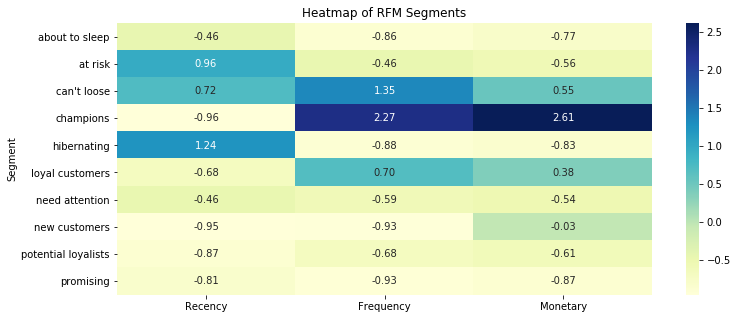

In [61]:
#Build the heatmap
plt.figure(figsize=(12, 5))
plt.title('Heatmap of RFM Segments')
sns.heatmap(data=prop_rfm,annot = True,fmt='.2f',cmap="YlGnBu")
plt.show()

## Cohort Analysis

In [62]:
def get_month(x) : return dt.datetime(x.year,x.month,1)
data['InvoiceMonth'] = data['InvoiceDate'].apply(get_month)
grouping = data.groupby('CustomerID')['InvoiceMonth']
data['CohortMonth'] = grouping.transform('min')
data.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,total_price,Year,Quarter,Month,Week,DayNb,Weekday,Day,Date,InvoiceMonth,CohortMonth
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,4,12,49,4,Friday,9,2011-12-09,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,4,12,49,4,Friday,9,2011-12-09,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,4,12,49,4,Friday,9,2011-12-09,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011,4,12,49,4,Friday,9,2011-12-09,2011-12-01,2011-08-01
541909,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France,18.00,2011,4,12,49,4,Friday,9,2011-12-09,2011-12-01,2011-08-01


In [63]:
def get_month_int (dframe,column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month , day 

invoice_year = data['Year']
invoice_month = data['Month']
cohort_year,cohort_month,_ = get_month_int(data,'CohortMonth')

year_diff = invoice_year - cohort_year 
month_diff = invoice_month - cohort_month 

data['CohortIndex'] = year_diff * 12 + month_diff + 1 

In [65]:
#Count monthly active customers from each cohort
grouping = data.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
# Return number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')

Retention Rate Table

In [68]:
# Retention table
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis 

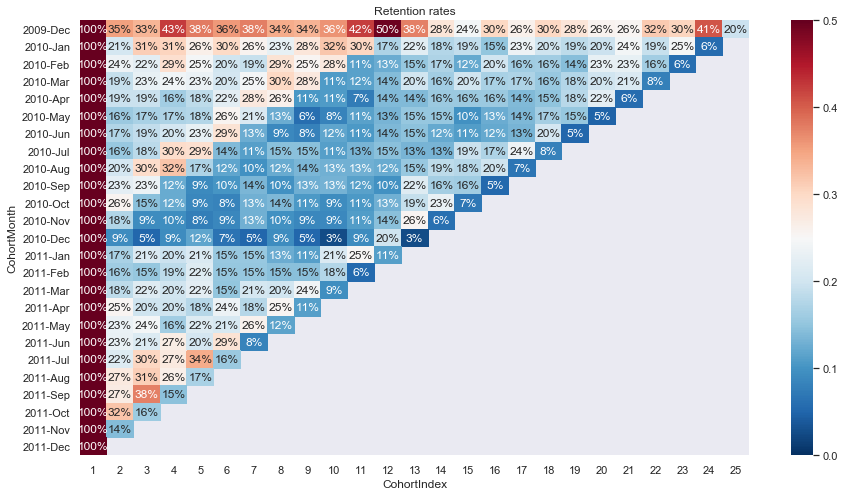

In [71]:
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.set()
ax = sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = .5,cmap="RdBu_r")
ax.set_yticklabels(retention.index.strftime('%Y-%b'))

plt.show()

## Market Basket Analysis

In [74]:
df_association = data[['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate','Price', 'CustomerID',]]
df_association['Description'] = df_association['Description'].str.strip()
df_association = df_association[df_association.Quantity >0]

In [77]:
item_count = (df_association.
     groupby(by = ['Description'])['Invoice'].
     count().
     reset_index().
     rename(columns = {'Invoice': 'ItemCount'})
     [['Description', 'ItemCount']]
    )
item_count.head()

,Description,ItemCount
0,DOORMAT UNION JACK GUNS AND ROSES,51
1,3 STRIPEY MICE FELTCRAFT,115
2,4 PURPLE FLOCK DINNER CANDLES,52
3,50'S CHRISTMAS GIFT BAG LARGE,109
4,ANIMAL STICKERS,12


In [78]:
threshold = 20
item_count = item_count.query('ItemCount >= @threshold')
item_count.head()

,Description,ItemCount
0,DOORMAT UNION JACK GUNS AND ROSES,51
1,3 STRIPEY MICE FELTCRAFT,115
2,4 PURPLE FLOCK DINNER CANDLES,52
3,50'S CHRISTMAS GIFT BAG LARGE,109
9,CHERRY BLOSSOM DECORATIVE FLASK,26


In [79]:
combined = df_association.merge(item_count, left_on = 'Description', right_on = 'Description', how = 'inner')

In [80]:
basket = pd.pivot_table(data=combined,index='Invoice',columns='Description',
                        values='Quantity',aggfunc='sum',fill_value=0)

In [81]:
basket.head()

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,CHERRY BLOSSOM DECORATIVE FLASK,DOLLY GIRL BEAKER,FLAMINGO LIGHTS,HOME SWEET HOME BLACKBOARD,I LOVE LONDON MINI BACKPACK,IVORY PAPER CUP CAKE CASES,...,ZINC HEART LATTICE TRAY OVAL,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE SWEETHEART LETTER TRAY
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# Presence of the product is required
def convert_into_binary(x):
    if x > 0:
        return 1
    else:
        return 0

basket_sets = basket.applymap(convert_into_binary)

In [83]:
len(basket_sets)

36800

In [84]:
#remove postage item as it is just a seal which almost all transaction contain. 
basket_sets.drop(columns=['POSTAGE'],inplace=True)

In [85]:
#Call apriori function and pass minimum support here we are passing 1%. That means 1 times in total number of transaction that item was present.
frequent_itemsets = apriori(basket_sets, min_support=0.0175, use_colnames=True)

In [86]:
frequent_itemsets

,support,itemsets
0,0.018587,(12 PENCILS SMALL TUBE SKULL)
1,0.017554,(3 HEARTS HANGING DECORATION RUSTIC)
2,0.019484,(3 STRIPEY MICE FELTCRAFT)
3,0.017772,(4 TRADITIONAL SPINNING TOPS)
4,0.036984,(6 RIBBONS RUSTIC CHARM)
...,...,...
253,0.031332,"(RED HANGING HEART T-LIGHT HOLDER, WHITE HANGI..."
254,0.022201,"(STRAWBERRY CERAMIC TRINKET BOX, SWEETHEART CE..."
255,0.018207,"(WOODEN FRAME ANTIQUE WHITE , WHITE HANGING HE..."
256,0.018043,"(WOODEN PICTURE FRAME WHITE FINISH, WHITE HANG..."


In [87]:
#We have association rules which need to put on frequent itemset. here we are setting based on lift and has minimum lift as 1
rules_mlxtend = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules_mlxtend.head(-5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 PINK PAISLEY CAKE CASES),0.047962,0.042880,0.020000,0.416997,9.724649,0.017943,1.641707
1,(PACK OF 60 PINK PAISLEY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.042880,0.047962,0.020000,0.466413,9.724649,0.017943,1.784223
2,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.031087,0.028288,0.019076,0.613636,21.692429,0.018197,2.515019
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.028288,0.031087,0.019076,0.674352,21.692429,0.018197,2.975335
4,(WHITE HANGING HEART T-LIGHT HOLDER),(ASSORTED COLOUR BIRD ORNAMENT),0.132826,0.072065,0.017609,0.132570,1.839578,0.008037,1.069751
5,(ASSORTED COLOUR BIRD ORNAMENT),(WHITE HANGING HEART T-LIGHT HOLDER),0.072065,0.132826,0.017609,0.244344,1.839578,0.008037,1.147577
6,(SPACEBOY LUNCH BOX ),(DOLLY GIRL LUNCH BOX),0.030109,0.027120,0.018261,0.606498,22.363861,0.017444,2.472366
7,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX ),0.027120,0.030109,0.018261,0.673347,22.363861,0.017444,2.969176
8,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.028696,0.025353,0.020190,0.703598,27.751794,0.019463,3.288265
9,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.025353,0.028696,0.020190,0.796356,27.751794,0.019463,4.769616


In [88]:
#As based business use case we can sort based on confidance and lift.
df_association_business = rules_mlxtend#[ (rules_mlxtend['lift'] >= 4) & (rules_mlxtend['confidence'] >= 0.8) ]

In [89]:
df_association_business

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 PINK PAISLEY CAKE CASES),0.047962,0.042880,0.020000,0.416997,9.724649,0.017943,1.641707
1,(PACK OF 60 PINK PAISLEY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.042880,0.047962,0.020000,0.466413,9.724649,0.017943,1.784223
2,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.031087,0.028288,0.019076,0.613636,21.692429,0.018197,2.515019
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.028288,0.031087,0.019076,0.674352,21.692429,0.018197,2.975335
4,(WHITE HANGING HEART T-LIGHT HOLDER),(ASSORTED COLOUR BIRD ORNAMENT),0.132826,0.072065,0.017609,0.132570,1.839578,0.008037,1.069751
5,(ASSORTED COLOUR BIRD ORNAMENT),(WHITE HANGING HEART T-LIGHT HOLDER),0.072065,0.132826,0.017609,0.244344,1.839578,0.008037,1.147577
6,(SPACEBOY LUNCH BOX ),(DOLLY GIRL LUNCH BOX),0.030109,0.027120,0.018261,0.606498,22.363861,0.017444,2.472366
7,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX ),0.027120,0.030109,0.018261,0.673347,22.363861,0.017444,2.969176
8,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.028696,0.025353,0.020190,0.703598,27.751794,0.019463,3.288265
9,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.025353,0.028696,0.020190,0.796356,27.751794,0.019463,4.769616


## Customer lifetime value

In [ ]:
observation_period_end = data['InvoiceDate'].max() + dt.timedelta(days=1)
calibration_period_ends = '2011-09-09'

In [ ]:
summary_data = summary_data_from_transaction_data(data, 
                                                   customer_id_col = 'CustomerID', 
                                                   datetime_col = 'InvoiceDate',
                                                   monetary_value_col='total_price',
                                                   observation_period_end= observation_period_end )
summary_data.head()

In [ ]:
summary_data.describe()

#### Basic Frequency/Recency analysis using the BG/NBD model

In [ ]:
# similar API to scikit-learn and lifelines.
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(summary_data['frequency'], summary_data['recency'], summary_data['T'])
print(bgf)
bgf.summary

#### Frequency/Recency Matrix

In [ ]:
fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf)

#### probability of still being alive

In [ ]:
fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

##### Ranking customers from best to worst

In [ ]:
t = 90
summary_data['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary_data['frequency'],
                                                                                              summary_data['recency'], 
                                                                                              summary_data['T'])
summary_data.sort_values(by='predicted_purchases').tail(5)

In [ ]:
plot_period_transactions(bgf)

#### Spliting calibration and holdout period

In [ ]:
summary_cal_holdout = calibration_and_holdout_data(data, 
                                                   customer_id_col = 'CustomerID', 
                                                   datetime_col = 'InvoiceDate',
                                                   monetary_value_col='total_price',
                                                   freq = 'D', #days
                                        calibration_period_end=calibration_period_ends,
                                        observation_period_end= observation_period_end )

In [ ]:
summary_cal_holdout.head()

In [ ]:
bgf.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)

##### Customer Predictions

In [ ]:
t = 10 #predict purchases in 10 periods
individual = summary_data.iloc[20]
# The below function is an alias to `bfg.conditional_expected_number_of_purchases_up_to_time`
bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])
# 0.0576511

##### Customer Probability Histories

In [ ]:
from lifetimes.plotting import plot_history_alive
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
id = 14606
days_since_birth = 365
sp_trans = data.loc[data['CustomerID'] == id]
plot_history_alive(bgf, days_since_birth, sp_trans, 'InvoiceDate')

#### The Gamma-Gamma model

In [ ]:
returning_customers_summary = summary_data[summary_data['frequency']>0]

returning_customers_summary.head()

In [ ]:
returning_customers_summary[['monetary_value', 'frequency']].corr()

In [ ]:
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value'])
print(ggf)

In [ ]:
ggf.conditional_expected_average_profit(
        summary_data['frequency'],
        summary_data['monetary_value']
    ).head(10)

In [ ]:
print("Expected conditional average profit: %s, Average profit: %s" % (
    ggf.conditional_expected_average_profit(
        summary_data['frequency'],
        summary_data['monetary_value']
    ).mean(),
    summary_data[summary_data['frequency']>0]['monetary_value'].mean()))

references : 
